In [1]:
import pandas as pd
import numpy as np

import seaborn as sbn
import matplotlib.pyplot as plt

In [2]:
!pip install --upgrade numpy

     |████████████████████████████████| 14.8 MB 137 kB/s            
  Attempting uninstall: numpy
    Found existing installation: numpy 1.16.3
    Uninstalling numpy-1.16.3:
      Successfully uninstalled numpy-1.16.3


In [2]:
np.__version__

'1.19.5'

For this part we are gonna use the seaborn dataset "planets"

In [76]:
df = sbn.load_dataset(name="planets")
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [77]:
df.shape

(1035, 6)

### Groupby

In [78]:
#lets group them by they method
dfg = df.groupby(by="method")
dfg.count()

,number,orbital_period,mass,distance,year
method,,,,,
Astrometry,2,2,0,2,2
Eclipse Timing Variations,9,9,2,4,9
Imaging,38,12,0,32,38
Microlensing,23,7,0,10,23
Orbital Brightness Modulation,3,3,0,2,3
Pulsar Timing,5,5,0,1,5
Pulsation Timing Variations,1,1,0,0,1
Radial Velocity,553,553,510,530,553
Transit,397,397,1,224,397


In [79]:
#number of groups
dfg.ngroups

10

In [80]:
#groups
dfg.groups.keys()

dict_keys(['Astrometry', 'Eclipse Timing Variations', 'Imaging', 'Microlensing', 'Orbital Brightness Modulation', 'Pulsar Timing', 'Pulsation Timing Variations', 'Radial Velocity', 'Transit', 'Transit Timing Variations'])

In [81]:
#some groups
dfg.get_group(name="Astrometry")

,method,number,orbital_period,mass,distance,year
113,Astrometry,1,246.36,NaN,20.77,2013
537,Astrometry,1,1016.00,NaN,14.98,2010


In [82]:
dfg.get_group(name="Microlensing")

,method,number,orbital_period,mass,distance,year
902,Microlensing,1,NaN,NaN,NaN,2008
903,Microlensing,1,NaN,NaN,NaN,2008
904,Microlensing,1,NaN,NaN,NaN,2009
905,Microlensing,1,NaN,NaN,3600.0,2013
906,Microlensing,1,2780.0,NaN,NaN,2011
907,Microlensing,1,NaN,NaN,NaN,2010
908,Microlensing,1,1970.0,NaN,NaN,2010
909,Microlensing,1,NaN,NaN,2300.0,2012
910,Microlensing,1,NaN,NaN,2800.0,2012
911,Microlensing,1,NaN,NaN,7720.0,2012


In [83]:
#we can also group the elements by using any other criteria. For intance lets make a list 
#of integers between 1-10 with a length df.shape[0] and use it to create the groups
id_group = np.random.randint(10, size=df.shape[0])
dfg_1to10 = df.groupby(by=id_group)
dfg_1to10.groups.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [84]:
dfg_1to10.get_group(name=1)

,method,number,orbital_period,mass,distance,year
2,Radial Velocity,1,763.000000,2.60,19.84,2011
4,Radial Velocity,1,516.220000,10.50,119.47,2009
17,Radial Velocity,5,14.651000,0.80,12.53,1996
48,Radial Velocity,1,2502.000000,1.55,3.22,2000
52,Radial Velocity,1,903.300000,1.85,13.79,2003
...,...,...,...,...,...,...
990,Transit,1,1.537365,NaN,450.00,2011
1021,Transit,1,2.484193,NaN,260.00,2013
1027,Imaging,1,NaN,NaN,19.20,2011
1028,Transit,1,3.352057,NaN,3200.00,2012


In [85]:
#for instance if we want to group by the decade the planet was discovered we first create a list with the decades
decade = 10*(df.year // 10)
decade

0       2000
1       2000
2       2010
3       2000
4       2000
        ... 
1030    2000
1031    2000
1032    2000
1033    2000
1034    2000
Name: year, Length: 1035, dtype: int64

In [86]:
#and the groups would be
dfg_decade = df.groupby(by=decade)
dfg_decade.groups.keys()

dict_keys([1980, 1990, 2000, 2010])

In [87]:
#planets dicovered in the decade of 1990
dfg_decade.get_group(name=1990)

,method,number,orbital_period,mass,distance,year
7,Radial Velocity,1,798.500000,NaN,21.41,1996
13,Radial Velocity,3,1078.000000,2.5300,14.08,1996
16,Radial Velocity,1,4.230785,0.4720,15.36,1995
17,Radial Velocity,5,14.651000,0.8000,12.53,1996
25,Radial Velocity,1,116.688400,NaN,18.11,1996
61,Radial Velocity,1,39.845000,1.0400,17.43,1997
62,Radial Velocity,1,3.313500,3.9000,15.60,1996
64,Radial Velocity,4,4.617033,0.6876,13.47,1996
65,Radial Velocity,4,241.258000,1.9810,13.47,1999
66,Radial Velocity,4,1276.460000,4.1320,13.47,1999


In [88]:
#we can also build the groups by using a dictionary that asigns to each index (so the indeces must match the values in the dic) a nickname
#nicknames = {method:np.random.randint(7, size=1, )[0] for method in df.method.unique()}
#nicknames
nicknames = {'Radial Velocity': 3,
             'Imaging': 2,
             'Eclipse Timing Variations': 3,
             'Transit': 2,
             'Astrometry': 2,
             'Transit Timing Variations': 3,
             'Orbital Brightness Modulation': 4,
             'Microlensing': 4,
             'Pulsar Timing': 3,
             'Pulsation Timing Variations': 4}

#making the method the index column and genarating the groups
dfg_dic = df.set_index(keys="method").groupby(nicknames)
dfg_dic.groups.keys()

dict_keys([2, 3, 4])

In [89]:
dfg_dic.get_group(name=4)

,number,orbital_period,mass,distance,year
method,,,,,
Orbital Brightness Modulation,2,0.240104,NaN,1180.0,2011
Orbital Brightness Modulation,2,0.342887,NaN,1180.0,2011
Orbital Brightness Modulation,1,1.544929,NaN,NaN,2013
Microlensing,1,NaN,NaN,NaN,2008
Microlensing,1,NaN,NaN,NaN,2008
Microlensing,1,NaN,NaN,NaN,2009
Microlensing,1,NaN,NaN,3600.0,2013
Microlensing,1,2780.000000,NaN,NaN,2011
Microlensing,1,NaN,NaN,NaN,2010


### Pivot tables

We may want to create some tables from a df in which we reorganize the data according some index and columns, for this purpose we may be using a pivot table

In [104]:
#creating a pivot table, the index column is the method
titanic = sbn.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [108]:
#pivot table
titanic.pivot_table(index=["sex"])

,adult_male,age,alone,fare,parch,pclass,sibsp,survived
sex,,,,,,,,
female,0.000000,27.915709,0.401274,44.479818,0.649682,2.159236,0.694268,0.742038
male,0.930676,30.726645,0.712305,25.523893,0.235702,2.389948,0.429809,0.188908


In [111]:
#by default pivot_table will show us the mean of the groups formed by the index. We can change this by using the argument aggfunc
#lets see how many women/men survived
titanic.pivot_table(values="survived", index="sex", aggfunc=np.sum)

,survived
sex,
female,233
male,109


In [113]:
#same as above but lets see the class of each female/male surviver
titanic.pivot_table(index=["sex", "class"], values="survived", aggfunc=np.sum)

survived
sex    class           
female First         91
       Second        70
       Third         72
male   First         45
       Second        17
       Third         47

In [116]:
#and if we wanna see also the embark town
titanic.pivot_table(index=["sex", "class"], values="survived", columns="embark_town", aggfunc=np.sum)

embark_town    Cherbourg  Queenstown  Southampton
sex    class                                     
female First          42           1           46
       Second          7           2           61
       Third          15          24           33
male   First          17           0           28
       Second          2           0           15
       Third          10           3           34

In [117]:
#we can know the total of elements in each grouop by using margin
titanic.pivot_table(index=["sex", "class"], values="survived", columns="embark_town", aggfunc=np.sum, margins=True)

embark_town    Cherbourg  Queenstown  Southampton  All
sex    class                                          
female First          42           1           46   89
       Second          7           2           61   70
       Third          15          24           33   72
male   First          17           0           28   45
       Second          2           0           15   17
       Third          10           3           34   47
All                   93          30          217  340

In [123]:
#we can also use bins to clasify the information
age_bins = pd.cut(x=titanic["age"], bins=[0, 18, 50, 120]).rename("age_bin")
age_bins

0      (18.0, 50.0]
1      (18.0, 50.0]
2      (18.0, 50.0]
3      (18.0, 50.0]
4      (18.0, 50.0]
           ...     
886    (18.0, 50.0]
887    (18.0, 50.0]
888             NaN
889    (18.0, 50.0]
890    (18.0, 50.0]
Name: age_bin, Length: 891, dtype: category
Categories (3, interval[int64]): [(0, 18] < (18, 50] < (50, 120]]

In [124]:
titanic.pivot_table(index=["sex", age_bins], columns="embark_town", values="survived", aggfunc=np.sum)

embark_town       Cherbourg  Queenstown  Southampton
sex    age_bin                                      
female (0, 18]         16.0         3.0         27.0
       (18, 50]        33.0         4.0         97.0
       (50, 120]        6.0         NaN          9.0
male   (0, 18]          4.0         0.0         20.0
       (18, 50]        18.0         1.0         44.0
       (50, 120]        2.0         0.0          4.0

### aggregate functions 

The agregate functions are those that reduce the series that from the group to an unique value, for intance the mean, tha std
or .describe() that give us some statistic of the group

In [5]:
#for instance, if we wanna know the average, the standard deviation, the maximum and minimum values for each group
#we can use the method group.aggregate() (or group.agg() which is an alias), this one will create a multy-index dataframe.
obtain = ["mean", "std", "min", "max"]
dfg.aggregate(func={"orbital_period":obtain, "mass":obtain, "distance":obtain, "year":obtain})

orbital_period                              \
                                        mean            std          min   
method                                                                     
Astrometry                        631.180000     544.217663   246.360000   
Eclipse Timing Variations        4751.644444    2499.130945  1916.250000   
Imaging                        118247.737500  213978.177277  4639.150000   
Microlensing                     3153.571429    1113.166333  1825.000000   
Orbital Brightness Modulation       0.709307       0.725493     0.240104   
Pulsar Timing                    7343.021201   16313.265573     0.090706   
Pulsation Timing Variations      1170.000000            NaN  1170.000000   
Radial Velocity                   823.354680    1454.926210     0.736540   
Transit                            21.102073      46.185893     0.355000   
Transit Timing Variations          79.783500      71.599884    22.339500   

                                                  mass                    \
                                         max      mean       std     min   
method                                                                     
Astrometry                       1016.000000       NaN       NaN     NaN   
Eclipse Timing Variations       10220.000000  5.125000  1.308148  4.2000   
Imaging                        730000.000000       NaN       NaN     NaN   
Microlensing                     5100.000000       NaN       NaN     NaN   
Orbital Brightness Modulation       1.544929       NaN       NaN     NaN   
Pulsar Timing                   36525.000000       NaN       NaN     NaN   
Pulsation Timing Variations      1170.000000       NaN       NaN     NaN   
Radial Velocity                 17337.500000  2.630699  3.825883  0.0036   
Transit                           331.600590  1.470000       NaN  1.4700   
Transit Timing Variations         160.000000       NaN       NaN     NaN   

                                         distance                        \
                                 max         mean          std      min   
method                                                                    
Astrometry                       NaN    17.875000     4.094148    14.98   
Eclipse Timing Variations       6.05   315.360000   213.203907   130.72   
Imaging                          NaN    67.715937    53.736817     7.69   
Microlensing                     NaN  4144.000000  2076.611556  1760.00   
Orbital Brightness Modulation    NaN  1180.000000     0.000000  1180.00   
Pulsar Timing                    NaN  1200.000000          NaN  1200.00   
Pulsation Timing Variations      NaN          NaN          NaN      NaN   
Radial Velocity                25.00    51.600208    45.559381     1.35   
Transit                         1.47   599.298080   913.876990    38.00   
Transit Timing Variations        NaN  1104.333333   915.819487   339.00   

                                               year                        
                                   max         mean       std   min   max  
method                                                                     
Astrometry                       20.77  2011.500000  2.121320  2010  2013  
Eclipse Timing Variations       500.00  2010.000000  1.414214  2008  2012  
Imaging                         165.00  2009.131579  2.781901  2004  2013  
Microlensing                   7720.00  2009.782609  2.859697  2004  2013  
Orbital Brightness Modulation  1180.00  2011.666667  1.154701  2011  2013  
Pulsar Timing                  1200.00  1998.400000  8.384510  1992  2011  
Pulsation Timing Variations        NaN  2007.000000       NaN  2007  2007  
Radial Velocity                 354.00  2007.518987  4.249052  1989  2014  
Transit                        8500.00  2011.236776  2.077867  2002  2014  
Transit Timing Variations      2119.00  2012.500000  1.290994  2011  2014

In [11]:
#we can group by several criteria, this will give us multiindex object:
dfg2 = df.groupby(by=["method", "year"])
dfg2.count()

number  orbital_period  mass  distance
method                    year                                        
Astrometry                2010       1               1     0         1
                          2013       1               1     0         1
Eclipse Timing Variations 2008       2               2     0         2
                          2009       1               1     1         0
                          2010       2               2     0         2
...                                ...             ...   ...       ...
Transit                   2014      40              40     0         4
Transit Timing Variations 2011       1               1     0         1
                          2012       1               1     0         1
                          2013       1               1     0         1
                          2014       1               0     0         0

[69 rows x 4 columns]

In [13]:
#when we're trying with a multyindex object we can wether use the multiindex or we can reset the indexes
df.groupby(by=["method", "year"], as_index=False).count()

,method,year,number,orbital_period,mass,distance
0,Astrometry,2010,1,1,0,1
1,Astrometry,2013,1,1,0,1
2,Eclipse Timing Variations,2008,2,2,0,2
3,Eclipse Timing Variations,2009,1,1,1,0
4,Eclipse Timing Variations,2010,2,2,0,2
...,...,...,...,...,...,...
64,Transit,2014,40,40,0,4
65,Transit Timing Variations,2011,1,1,0,1
66,Transit Timing Variations,2012,1,1,0,1
67,Transit Timing Variations,2013,1,1,0,1


In [19]:
#if we wanna know the size of group
#for the second group ("method", "year")
dfg2.size()

method                     year
Astrometry                 2010     1
                           2013     1
Eclipse Timing Variations  2008     2
                           2009     1
                           2010     2
                                   ..
Transit                    2014    40
Transit Timing Variations  2011     1
                           2012     1
                           2013     1
                           2014     1
Length: 69, dtype: int64

In [21]:
#for the first group ("method")
dfg.size()

method
Astrometry                         2
Eclipse Timing Variations          9
Imaging                           38
Microlensing                      23
Orbital Brightness Modulation      3
Pulsar Timing                      5
Pulsation Timing Variations        1
Radial Velocity                  553
Transit                          397
Transit Timing Variations          4
dtype: int64

In [24]:
#we can obtain some statistic information for the groups

In [22]:
dfg.describe()

number                                           \
                               count      mean       std  min  25%  50%   75%   
method                                                                          
Astrometry                       2.0  1.000000  0.000000  1.0  1.0  1.0  1.00   
Eclipse Timing Variations        9.0  1.666667  0.500000  1.0  1.0  2.0  2.00   
Imaging                         38.0  1.315789  0.933035  1.0  1.0  1.0  1.00   
Microlensing                    23.0  1.173913  0.387553  1.0  1.0  1.0  1.00   
Orbital Brightness Modulation    3.0  1.666667  0.577350  1.0  1.5  2.0  2.00   
Pulsar Timing                    5.0  2.200000  1.095445  1.0  1.0  3.0  3.00   
Pulsation Timing Variations      1.0  1.000000       NaN  1.0  1.0  1.0  1.00   
Radial Velocity                553.0  1.721519  1.157141  1.0  1.0  1.0  2.00   
Transit                        397.0  1.954660  1.399119  1.0  1.0  1.0  2.00   
Transit Timing Variations        4.0  2.250000  0.500000  2.0  2.0  2.0  2.25   

                                   orbital_period                 ...  \
                               max          count           mean  ...   
method                                                            ...   
Astrometry                     1.0            2.0     631.180000  ...   
Eclipse Timing Variations      2.0            9.0    4751.644444  ...   
Imaging                        4.0           12.0  118247.737500  ...   
Microlensing                   2.0            7.0    3153.571429  ...   
Orbital Brightness Modulation  2.0            3.0       0.709307  ...   
Pulsar Timing                  3.0            5.0    7343.021201  ...   
Pulsation Timing Variations    1.0            1.0    1170.000000  ...   
Radial Velocity                6.0          553.0     823.354680  ...   
Transit                        7.0          397.0      21.102073  ...   
Transit Timing Variations      3.0            3.0      79.783500  ...   

                                distance            year               \
                                     75%      max  count         mean   
method                                                                  
Astrometry                       19.3225    20.77    2.0  2011.500000   
Eclipse Timing Variations       500.0000   500.00    9.0  2010.000000   
Imaging                         132.6975   165.00   38.0  2009.131579   
Microlensing                   4747.5000  7720.00   23.0  2009.782609   
Orbital Brightness Modulation  1180.0000  1180.00    3.0  2011.666667   
Pulsar Timing                  1200.0000  1200.00    5.0  1998.400000   
Pulsation Timing Variations          NaN      NaN    1.0  2007.000000   
Radial Velocity                  59.2175   354.00  553.0  2007.518987   
Transit                         650.0000  8500.00  397.0  2011.236776   
Transit Timing Variations      1487.0000  2119.00    4.0  2012.500000   

                                                                           \
                                    std     min      25%     50%      75%   
method                                                                      
Astrometry                     2.121320  2010.0  2010.75  2011.5  2012.25   
Eclipse Timing Variations      1.414214  2008.0  2009.00  2010.0  2011.00   
Imaging                        2.781901  2004.0  2008.00  2009.0  2011.00   
Microlensing                   2.859697  2004.0  2008.00  2010.0  2012.00   
Orbital Brightness Modulation  1.154701  2011.0  2011.00  2011.0  2012.00   
Pulsar Timing                  8.384510  1992.0  1992.00  1994.0  2003.00   
Pulsation Timing Variations         NaN  2007.0  2007.00  2007.0  2007.00   
Radial Velocity                4.249052  1989.0  2005.00  2009.0  2011.00   
Transit                        2.077867  2002.0  2010.00  2012.0  2013.00   
Transit Timing Variations      1.290994  2011.0  2011.75  2012.5  2013.25   

                                       
                                  

In [25]:
dfg2.describe()

number                                       \
                                count   mean       std  min  25%  50%  75%   
method                    year                                               
Astrometry                2010    1.0  1.000       NaN  1.0  1.0  1.0  1.0   
                          2013    1.0  1.000       NaN  1.0  1.0  1.0  1.0   
Eclipse Timing Variations 2008    2.0  2.000  0.000000  2.0  2.0  2.0  2.0   
                          2009    1.0  1.000       NaN  1.0  1.0  1.0  1.0   
                          2010    2.0  2.000  0.000000  2.0  2.0  2.0  2.0   
...                               ...    ...       ...  ...  ...  ...  ...   
Transit                   2014   40.0  2.325  1.308503  1.0  1.0  2.0  3.0   
Transit Timing Variations 2011    1.0  2.000       NaN  2.0  2.0  2.0  2.0   
                          2012    1.0  2.000       NaN  2.0  2.0  2.0  2.0   
                          2013    1.0  2.000       NaN  2.0  2.0  2.0  2.0   
                          2014    1.0  3.000       NaN  3.0  3.0  3.0  3.0   

                                    orbital_period                ...  mass  \
                                max          count          mean  ...   75%   
method                    year                                    ...         
Astrometry                2010  1.0            1.0   1016.000000  ...   NaN   
                          2013  1.0            1.0    246.360000  ...   NaN   
Eclipse Timing Variations 2008  2.0            2.0   4544.000000  ...   NaN   
                          2009  1.0            1.0  10220.000000  ...  6.05   
                          2010  2.0            2.0   4228.525000  ...   NaN   
...                             ...            ...           ...  ...   ...   
Transit                   2014  5.0           40.0     18.923712  ...   NaN   
Transit Timing Variations 2011  2.0            1.0    160.000000  ...   NaN   
                          2012  2.0            1.0     57.011000  ...   NaN   
                          2013  2.0            1.0     22.339500  ...   NaN   
                          2014  3.0            0.0           NaN  ...   NaN   

                                     distance                                \
                                 max    count     mean         std      min   
method                    year                                                
Astrometry                2010   NaN      1.0    14.98         NaN    14.98   
                          2013   NaN      1.0    20.77         NaN    20.77   
Eclipse Timing Variations 2008   NaN      2.0   130.72    0.000000   130.72   
                          2009  6.05      0.0      NaN         NaN      NaN   
                          2010   NaN      2.0   500.00    0.000000   500.00   
...                              ...      ...      ...         ...      ...   
Transit                   2014   NaN      4.0   517.50  373.175115   222.00   
Transit Timing Variations 2011   NaN      1.0  2119.00         NaN  2119.00   
                          2012   NaN      1.0   855.00         NaN   855.00   
                          2013   NaN      1.0   339.00         NaN   339.00   
                          2014   NaN      0.0      NaN         NaN      NaN   

                                                                    
                                    25%      50%      75%      max  
method                    year                                      
Astrometry                2010    14.98    14.98    14.98    14.98  
                          2013    20.77    20.77    20.77    20.77  
Eclipse Timing Variations 2008   130.72   130.72   130.72   130.72  
                          2009      NaN      NaN      NaN      NaN  
                          2010   500.00   500.00   500.00   500.00  
...                                 ...      ...      ...      ...  
Transit                   2014   297.00   396.00   616.50  1056.00  
Transit Timing Variations 2011  21

In [33]:
dfg.mean()

,number,orbital_period,mass,distance,year
method,,,,,
Astrometry,1.000000,631.180000,NaN,17.875000,2011.500000
Eclipse Timing Variations,1.666667,4751.644444,5.125000,315.360000,2010.000000
Imaging,1.315789,118247.737500,NaN,67.715937,2009.131579
Microlensing,1.173913,3153.571429,NaN,4144.000000,2009.782609
Orbital Brightness Modulation,1.666667,0.709307,NaN,1180.000000,2011.666667
Pulsar Timing,2.200000,7343.021201,NaN,1200.000000,1998.400000
Pulsation Timing Variations,1.000000,1170.000000,NaN,NaN,2007.000000
Radial Velocity,1.721519,823.354680,2.630699,51.600208,2007.518987
Transit,1.954660,21.102073,1.470000,599.298080,2011.236776


In [34]:
dfg2.mean()

number  orbital_period  mass  distance
method                    year                                        
Astrometry                2010   1.000     1016.000000   NaN     14.98
                          2013   1.000      246.360000   NaN     20.77
Eclipse Timing Variations 2008   2.000     4544.000000   NaN    130.72
                          2009   1.000    10220.000000  6.05       NaN
                          2010   2.000     4228.525000   NaN    500.00
...                                ...             ...   ...       ...
Transit                   2014   2.325       18.923712   NaN    517.50
Transit Timing Variations 2011   2.000      160.000000   NaN   2119.00
                          2012   2.000       57.011000   NaN    855.00
                          2013   2.000       22.339500   NaN    339.00
                          2014   3.000             NaN   NaN       NaN

[69 rows x 4 columns]

### Transformations

In [53]:
#transform returns a size-like object as the one it is applyed. It fills each element with the value computed by func

In [55]:
#summing 2 to each row
dfg.transform(func=lambda x: x+2)

,number,orbital_period,mass,distance,year
0,3,271.300000,9.10,79.40,2008
1,3,876.774000,4.21,58.95,2010
2,3,765.000000,4.60,21.84,2013
3,3,328.030000,21.40,112.62,2009
4,3,518.220000,12.50,121.47,2011
...,...,...,...,...,...
1030,3,5.941507,NaN,174.00,2008
1031,3,4.615864,NaN,150.00,2009
1032,3,5.191524,NaN,176.00,2009
1033,3,6.125083,NaN,295.00,2010


In [57]:
#filling with the average of each group
#if we use the mean function then we would get the same result but filling the nan values with the mean
dfg.transform(func=lambda x:sum(x)/len(x))

,number,orbital_period,mass,distance,year
0,1.721519,823.354680,NaN,NaN,2007.518987
1,1.721519,823.354680,NaN,NaN,2007.518987
2,1.721519,823.354680,NaN,NaN,2007.518987
3,1.721519,823.354680,NaN,NaN,2007.518987
4,1.721519,823.354680,NaN,NaN,2007.518987
...,...,...,...,...,...
1030,1.954660,21.102073,NaN,NaN,2011.236776
1031,1.954660,21.102073,NaN,NaN,2011.236776
1032,1.954660,21.102073,NaN,NaN,2011.236776
1033,1.954660,21.102073,NaN,NaN,2011.236776


In [59]:
dfg.transform(func="mean")

,number,orbital_period,mass,distance,year
0,1.721519,823.354680,2.630699,51.600208,2007.518987
1,1.721519,823.354680,2.630699,51.600208,2007.518987
2,1.721519,823.354680,2.630699,51.600208,2007.518987
3,1.721519,823.354680,2.630699,51.600208,2007.518987
4,1.721519,823.354680,2.630699,51.600208,2007.518987
...,...,...,...,...,...
1030,1.954660,21.102073,1.470000,599.298080,2011.236776
1031,1.954660,21.102073,1.470000,599.298080,2011.236776
1032,1.954660,21.102073,1.470000,599.298080,2011.236776
1033,1.954660,21.102073,1.470000,599.298080,2011.236776


### Filter 

Filter will return a new df excluding the filtered data

In [130]:
#lets see the mean distances for each method with average distance >700
dfg.distance.mean()[dfg.distance.mean()>700]

method
Microlensing                     4144.000000
Orbital Brightness Modulation    1180.000000
Pulsar Timing                    1200.000000
Transit Timing Variations        1104.333333
Name: distance, dtype: float64

In [134]:
#and how many planets each method has
dfg.number.count()[dfg.distance.mean()>700]

method
Microlensing                     23
Orbital Brightness Modulation     3
Pulsar Timing                     5
Transit Timing Variations         4
Name: number, dtype: int64

In [135]:
#so the total is
dfg.number.count()[dfg.distance.mean()>700].sum()

35

In [138]:
#each of those planet by using filter
dfg.filter(func=lambda x: x["distance"].mean()>700)

,method,number,orbital_period,mass,distance,year
680,Transit Timing Variations,2,160.000000,NaN,2119.0,2011
736,Transit Timing Variations,2,57.011000,NaN,855.0,2012
749,Transit Timing Variations,3,NaN,NaN,NaN,2014
787,Orbital Brightness Modulation,2,0.240104,NaN,1180.0,2011
788,Orbital Brightness Modulation,2,0.342887,NaN,1180.0,2011
792,Orbital Brightness Modulation,1,1.544929,NaN,NaN,2013
813,Transit Timing Variations,2,22.339500,NaN,339.0,2013
902,Microlensing,1,NaN,NaN,NaN,2008
903,Microlensing,1,NaN,NaN,NaN,2008
904,Microlensing,1,NaN,NaN,NaN,2009


### Heatmaps 

In [126]:
#we can use heatmaps from seaborn to see in colored pixels the relation between variables in a plot
#lets use the dataset of the titanic
titanic = sbn.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [131]:
titanic_group = titanic.pivot_table(values="survived" ,index="sex", columns="embark_town", aggfunc=np.sum)
titanic_group

embark_town,Cherbourg,Queenstown,Southampton
sex,,,
female,64,27,140
male,29,3,77


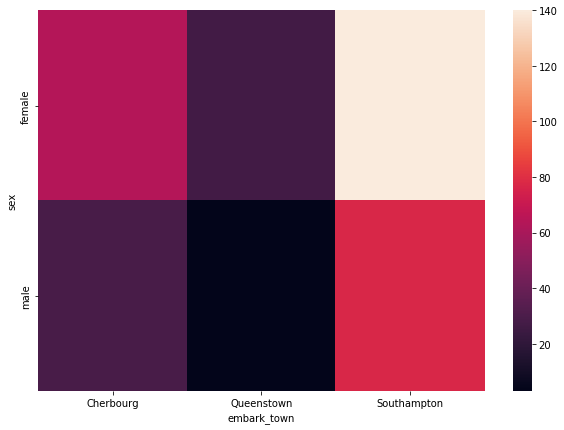

In [138]:
fig, ax = plt.subplots(figsize=(10,7))
sbn.heatmap(data=titanic_group, ax=ax) #, cmap="coolwarm")